<a href="https://colab.research.google.com/github/Arddistic/Arddistic/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cmath
import cv2
import math as m
from matplotlib import pyplot as plt
import numpy as np
import scipy


from google.colab import files
from PIL import Image
from skimage import io

Saving building.jpg to building (3).jpg


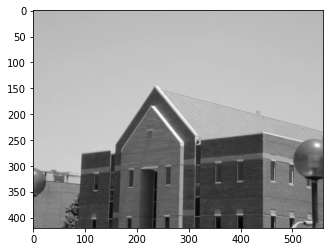

In [ ]:
uploaded = files.upload()

img = io.imread('building.jpg')

plt.imshow(img, 'gray' )

img = np.array(img)

## part a

In [ ]:
def sobel_operator(img):

    # Creating the sobel operator matrices

    Sx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
    Sy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

    [r, c] = np.shape(img)  # obtaining the shape of the image
    G = np.zeros(img.shape)  # output image array initialization

    # Implementing the operator on the image in x and y directions

    for i in range(r - 2):
        for j in range(c - 2):

            # gradient in X direction
            sx = np.sum(np.multiply(Sx, img[i:i + 3, j:j + 3]))
            # gradient in Y direction
            sy = np.sum(np.multiply(Sy, img[i:i + 3, j:j + 3]))

            # gradient magnitude
            G[i + 1, j + 1] = np.sqrt(sx**2 + sy**2)

    return G

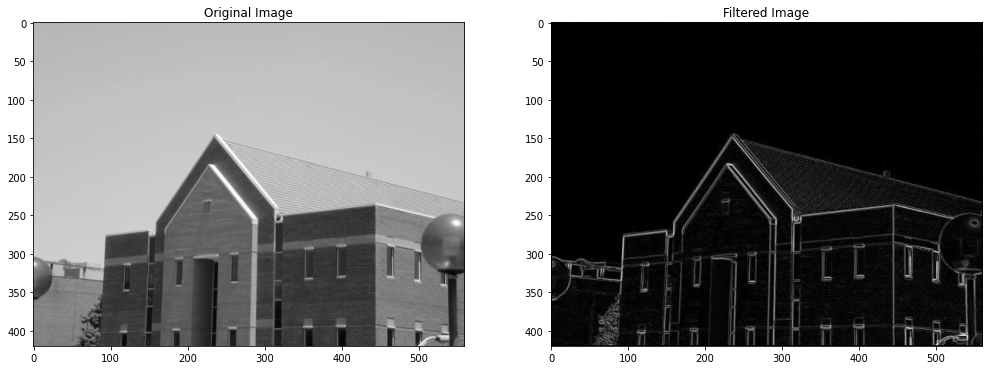

In [ ]:
plt.subplots(figsize = (17, 17))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow( img , 'gray' )

sb = sobel_operator(img)

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow( sb , 'gray' )

## part b

In [ ]:
def smoothing_f(size):

    f = np.ones((size, size)) / size**2

    return f

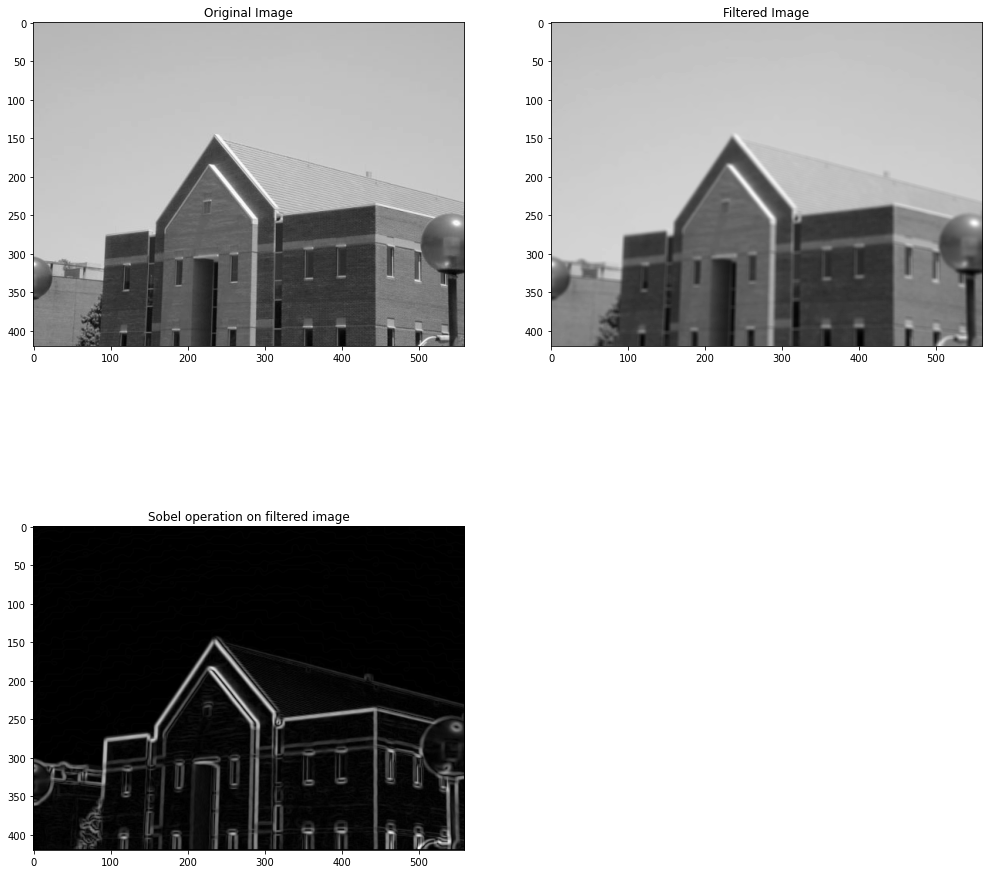

In [ ]:
plt.subplots(figsize = (17, 17))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img , 'gray')

# Averaging filter Size = 5
filter = smoothing_f(5)

# convolving the image and the filter using cv2.filter2D function
f_img = cv2.filter2D(img, -1, filter)

plt.subplot(2, 2, 2)
plt.title('Filtered Image')
plt.imshow(f_img , 'gray')

# Appling sobel operator on the filtered image
sb = sobel_operator( f_img )

plt.subplot(2, 2, 3)
plt.title('Sobel operation on filtered image')
plt.imshow(sb , 'gray')

The roof has been smoothed out!

## part c

In [ ]:
def threshold(img, ts):
    x, y = img.shape

    for i in range(x):
        for j in range(y):

            if img[i, j] > ts:
                img[i, j] = 1
            else:
                img[i, j] = 0
    return img

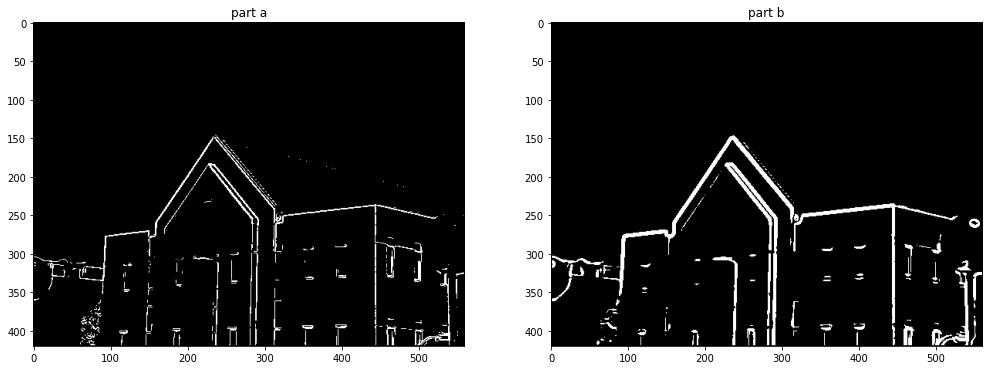

In [ ]:
plt.subplots(figsize = (17, 17))

sb_a = sobel_operator( img )

sb_b = sobel_operator( f_img )

# 33% of the maximum value as the threshold

ts_a = 33 * np.max( sb_a ) / 100  # Setting the threshold for part a

ts_b = 33 * np.max( sb_b ) / 100  # Setting the threshold for part b

a = threshold(sb_a, ts_a)
b = threshold(sb_b, ts_b)

plt.subplot(1, 2, 1)
plt.title('part a')
plt.imshow(a, 'gray')

plt.subplot(1, 2, 2)
plt.title('part b')
plt.imshow(b, 'gray')



## part d - Marr-Hildreth Edge Detector

In [ ]:
def mHED(img, sigma):

    size = int(2*(np.ceil(3*sigma))+1) # Setting the size of the LoG
    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))


    g = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * np.exp(-(x**2+y**2) / (2.0*sigma**2)) / (2.0 * np.pi * sigma**2) # Gradient

    g_size = g.shape[0]


    log = np.zeros_like(img, dtype=float) # Initializing the primary output array, LoG

    # applying the filter on the image
    for i in range(img.shape[0]-(g_size-1)):
        for j in range(img.shape[1]-(g_size-1)):
            temp = img[i:i+g_size, j:j+g_size] * g
            log[i, j] = np.sum(temp)


    zero_crossing = np.zeros(log.shape) # Initializing the zero crossed output array

    for i in range(log.shape[0]-(g_size-1)):
        for j in range(log.shape[1]-(g_size-1)):

            if log[i][j] == 0:

                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):

                    zero_crossing[i][j] = 255

            if log[i][j] < 0:

                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):

                    zero_crossing[i][j] = 255

    return zero_crossing

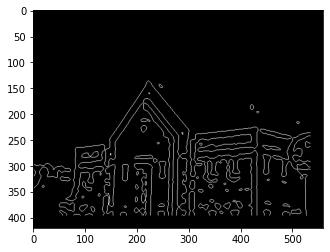

In [ ]:
plt.imshow(mHED(img, 4), 'gray')

## part e - Canny Edge Detector


In [1]:
def Gauss_filter(size, sigma):

    xy = np.floor([ size/2, size/2])
    f = np.zeros((size, size))

    for i in range(size):
        for j in range(size):

            f[i, j] = np.exp(( -(0.5/(sigma**2)) * ((i - xy[0]**2) + (j - xy[0])**2) ) / 2*np.pi*sigma**2)

    return f